In [1]:
using Pkg
using Plots

Pkg.DEFAULT_IO[] = stdout
Pkg.activate("..")
include("../Grid/Unstaggered.jl")

  Activating environment at `~/Desktop/PhD/Codes/julia_package/ToyModel.jl/Project.toml`


Grid

In [2]:
Lx = 100
nx = 25
grid = Grid(nx, 0, Lx)
x_full = LinRange(0, Lx, nx+1)

26-element LinRange{Float64}:
 0.0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,…,76.0,80.0,84.0,88.0,92.0,96.0,100.0

In [3]:
function partial_x2_cd!(d2f, fun, grid)
    
    nx, dx = grid.nx, grid.dx
    
    for i in 2:nx-1
        d2f[i] = 1/(dx^2) * (fun[i+1] - 2*fun[i] + fun[i-1])
    end
    d2f[1] = 1/(dx^2) * (fun[2] - 2*fun[1] + fun[nx])
    d2f[nx] = 1/(dx^2) * (fun[1] - 2*fun[nx] + fun[nx-1])
    return d2f
end

function diff_x!(diff, d2f, kappa, trcr, grid)
    
    partial_x2_cd!(d2f, trcr, grid)
    @. diff = kappa * d2f
end

diff_x! (generic function with 1 method)

In [4]:
x = grid.x
dx = grid.dx

lmda = (2*pi)/Lx
phi_old = sin.(lmda*x_full)[1:nx]
phi_new = zeros(nx)
phi_true = zeros(nx)
d2f = zeros(nx)
diff = zeros(nx)

t_start = 0
t_end = 40
dt = 1

kappa = 4.0

#Needed for making animations
n_steps = Int(t_end/dt)
phi_data = zeros(nx, n_steps + 1)
phi_true_data = zeros(nx, n_steps + 1)

count = 1

for t in t_start:dt:t_end
    diff_x!(diff, d2f, kappa, phi_old, grid)
    phi_new = phi_old + dt*diff
    @. phi_true = exp(-lmda^2 * (t-dt) * kappa) * sin(lmda*x_full[1:nx])
    phi_old = phi_new
    
    phi_data[:, count] = phi_old
    phi_true_data[:, count] = phi_true
    count = count+1
end

┌ Info: Saved animation to 
│   fn = /Users/dhruvbhagtani/Desktop/PhD/Codes/julia_package/ToyModel.jl/Diffusion/1dDiff.gif
└ @ Plots /Users/dhruvbhagtani/.julia/packages/Plots/XCJgc/src/animation.jl:104


Plots.AnimatedGif("/Users/dhruvbhagtani/Desktop/PhD/Codes/julia_package/ToyModel.jl/Diffusion/1dDiff.gif")
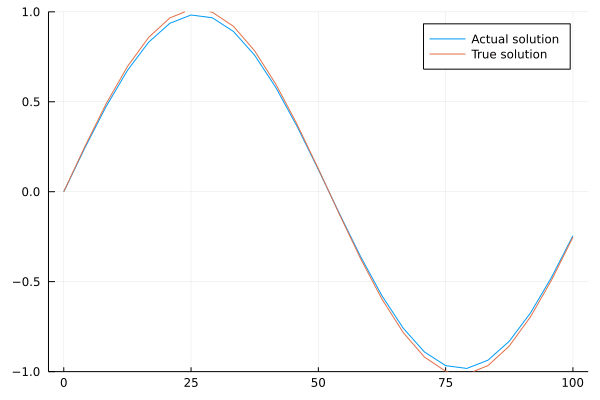

In [5]:
anim = @animate for i = 1:n_steps
    plot(x, phi_data[:, i], label = "Actual solution")
    plot!(x, phi_true_data[:, i], label = "True solution")
    plot!(ylims = (-1, 1))
end
 
gif(anim, "1dDiff.gif", fps = 8)